## Reading in transient data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
lc = pd.read_csv('data/villar_kn_redshift0.01_mjd57982.csv')
lc

,day,mjd,filt,mag,magerr
0,1,57983,i,17.235234,0.0028
1,2,57984,i,17.952256,0.0045
2,3,57985,i,18.647768,0.0075
3,4,57986,i,18.988473,0.0126
4,5,57987,i,19.320973,0.0163
5,6,57988,i,19.743586,0.0248
6,7,57989,i,20.251442,0.0235
7,8,57990,i,20.817951,0.0331
8,9,57991,i,21.399131,0.0730
9,10,57992,i,21.939768,0.1603


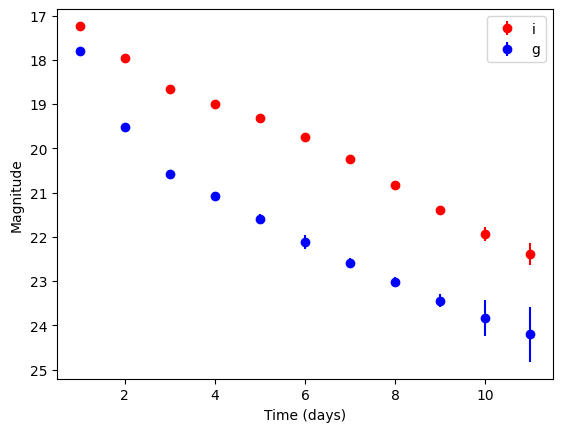

In [47]:
colordic = {'i':'red', 'g':'blue'}

for filt in lc['filt'].unique():
    plt.errorbar(lc[lc['filt'] == filt]['day'].astype(float), lc[lc['filt'] == filt]['mag'].astype(float), 
                 lc[lc['filt'] == filt]['magerr'].astype(float),ls = '', marker='o', color=colordic[filt], label=filt)

plt.ticklabel_format(useOffset=False, style='plain')
plt.gca().invert_yaxis()
plt.xlabel('Time (days)')
plt.ylabel('Magnitude')
plt.legend()

In [45]:
# Just using a dummy limiting magnitude value here
# Can exchange with last magnitude prior to outburst
lim_mag = 24.5

i_peak = np.min(lc[lc['filt'] == 'i']['mag'])
g_peak = np.min(lc[lc['filt'] == 'g']['mag'])
i_peak_mjd = lc.iloc[np.where((lc['mag'] == i_peak) & (lc['filt'] == 'i'))]['mjd'].iloc[0]
g_peak_mjd = lc.iloc[np.where((lc['mag'] == g_peak) & (lc['filt'] == 'g'))]['mjd'].iloc[0]

i_rise = (i_peak - lim_mag) / 1
g_rise = (g_peak - lim_mag) / 1

i_faint = np.max(lc[lc['filt'] == 'i']['mag'])
g_faint = np.max(lc[lc['filt'] == 'g']['mag'])
i_faint_mjd = lc.iloc[np.where((lc['mag'] == i_faint) & (lc['filt'] == 'i'))]['mjd'].iloc[0]
g_faint_mjd = lc.iloc[np.where((lc['mag'] == g_faint) & (lc['filt'] == 'g'))]['mjd'].iloc[0]

i_fade = (i_faint - i_peak) / (i_faint_mjd - i_peak_mjd)
g_fade = (g_faint - g_peak) / (g_faint_mjd - g_peak_mjd)


print('=============================')
print('TRANSIENT RISE AND FADE RATES')
print('')
print('i-band rise: ', i_rise)
print('g-band rise: ', g_rise)

print('')
print('i-band fade: ', i_fade)
print('g-band fade: ', g_fade)

print('')
print(f'In i-band, the transient peaked at {i_peak_mjd} MJD and faded until {i_faint_mjd} MJD')
print(f'In g-band, the transient peaked at {g_peak_mjd} MJD and faded until {g_faint_mjd} MJD')

TRANSIENT RISE AND FADE RATES

i-band rise:  -7.2647655695166335
g-band rise:  -6.694100050790848

i-band fade:  0.5153177032516943
g-band fade:  0.6401340823138831

In i-band, the transient peaked at 57983 MJD and faded until 57993 MJD
In g-band, the transient peaked at 57983 MJD and faded until 57993 MJD


## Fitting a basic polynomial

Fitting two bands (i and g) separately, through different polynomial orders and calculating parameters

### 1st order polynomial

In [53]:
x_i = np.array(lc[lc['filt'] == 'i']['day'])

y_i = np.array(lc[lc['filt'] == 'i']['mag'])
y_i = [float(x) for x in y_i]
y_i_err = np.array(lc[lc['filt'] == 'i']['magerr'])
y_i_err = [float(x) for x in y_i_err]

####

x_g = np.array(lc[lc['filt'] == 'g']['day'])

y_g = np.array(lc[lc['filt'] == 'g']['mag'])
y_g = [float(x) for x in y_g]
y_g_err = np.array(lc[lc['filt'] == 'g']['magerr'])
y_g_err = [float(x) for x in y_g_err]

In [54]:
z_i_1 = np.polyfit(x_i, y_i, 1)
p_i_1 = np.poly1d(z_i_1)

z_g_1 = np.polyfit(x_g, y_g, 1)
p_g_1 = np.poly1d(z_g_1)

y_i = 
 
0.496 x + 16.9

y_g = 
 
0.5707 x + 18.37



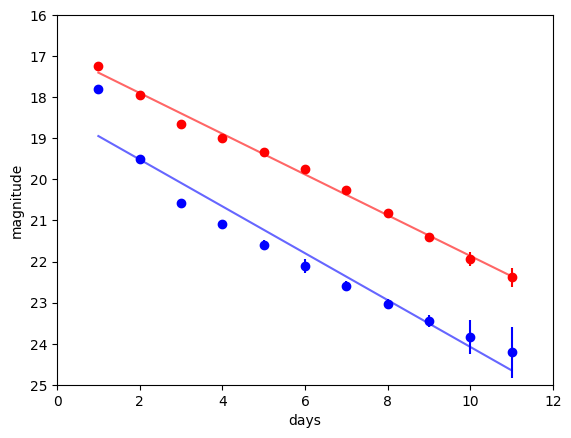

In [61]:
xp = np.linspace(1, 11, 100)

plt.errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
plt.plot(xp, p_i_1(xp), 'r-', alpha=0.6)
print('y_i = ')
print(np.poly1d(p_i_1))
print()

plt.errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
plt.plot(xp, p_g_1(xp), 'b-', alpha=0.6)
print('y_g = ')
print(np.poly1d(p_g_1))
print()

plt.xlim(0,12)
plt.ylim(16,25)

plt.xlabel('days')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()

In [11]:
z_i = np.polyfit(x_i[2:9], y_i[2:9], 10)
p_i = np.poly1d(z_i)

/tmp/ipykernel_25297/41907924.py:1: RankWarning: Polyfit may be poorly conditioned
  z_i = np.polyfit(x_i[2:9], y_i[2:9], 10)


In [12]:
x_g = np.array(flc[flc['filt'] == 'g']['time_days'])

y_g = np.array(flc[flc['filt'] == 'g']['MAG_AUTO'])
y_g = [float(x) for x in y_g]
y_g_err = np.array(flc[flc['filt'] == 'g']['MAGERR_AUTO'])
y_g_err = [float(x) for x in y_g_err]

print(x_g)
print(y_g)

[0 1 2 3 4 5 6 7 8 9]
[23.7403, 23.484, 23.4609, 22.6088, 19.3235, 20.4771, 22.8705, 23.2069, 23.2471, 23.1807]


In [13]:
z_g = np.polyfit(x_g[2:9], y_g[2:9], 12)
p_g = np.poly1d(z_g)

/tmp/ipykernel_25297/2939955347.py:1: RankWarning: Polyfit may be poorly conditioned
  z_g = np.polyfit(x_g[2:9], y_g[2:9], 12)


y_i = 
            10             9             8             7            6
-9.345e-07 x  + 9.701e-06 x + 5.593e-05 x - 0.0002691 x - 0.005276 x
            5          4         3         2
 - 0.01389 x + 0.3019 x + 1.823 x - 23.04 x + 66.07 x - 34.8

y_g = 
            12             11             10             9            8
-1.429e-08 x  + 6.692e-08 x  + 9.436e-07 x  + 4.042e-06 x - 2.14e-05 x
             7            6          5          4          3         2
 - 0.000482 x - 0.003083 x + 0.0079 x + 0.2821 x + 0.7801 x - 19.26 x + 63.66 x - 37.57



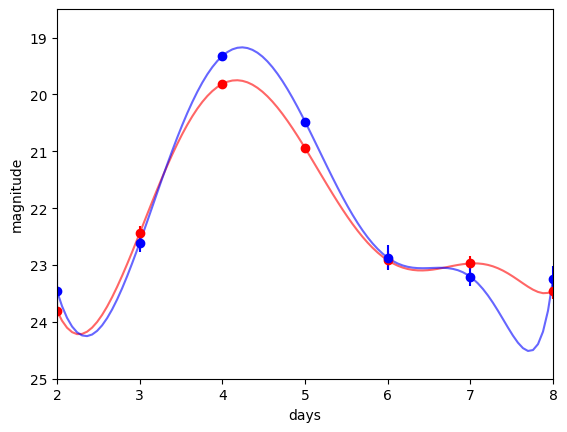

In [14]:
xp = np.linspace(2, 8, 100)

plt.errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
plt.plot(xp, p_i(xp), 'r-', alpha=0.6)
print('y_i = ')
print(np.poly1d(p_i))
print()

plt.errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
plt.plot(xp, p_g(xp), 'b-', alpha=0.6)
print('y_g = ')
print(np.poly1d(p_g))
print()

plt.xlim(2,8)
plt.ylim(18.5,25)

plt.xlabel('days')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()
# plt.savefig('AT2022kak_polynomial_fit',bbox_inches='tight')

In [15]:
poly_id = np.polyder(p_i)
poly_gd = np.polyder(p_g)

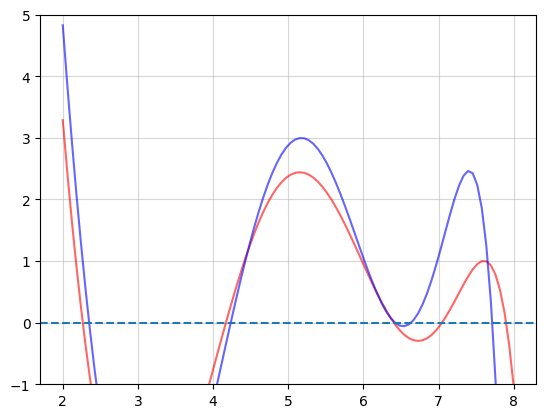

In [16]:
plt.plot(xp, poly_id(xp), 'r-', alpha=0.6)
plt.plot(xp, poly_gd(xp), 'b-', alpha=0.6)
plt.axhline(0, ls='--')
plt.ylim([-1,5])
plt.grid(alpha=0.5)

In [17]:
arr_i_tuple = []
arr_i = []
for i in np.arange(4.1,4.3,0.001):
    x = np.polyval(poly_id, i)
    
    arr_i_tuple.append(tuple((i,x)))
    arr_i.append(x)
    
arr_i_abs = [abs(x) for x in arr_i]
idx = arr_i_abs.index(min(arr_i_abs))
arr_i_tuple[idx]

(4.171000000000023, -0.0009415699550316958)

In [18]:
arr_g_tuple = []
arr_g = []
for i in np.arange(4.1,4.3,0.001):
    x = np.polyval(poly_gd, i)
    
    arr_g_tuple.append(tuple((i,x)))
    arr_g.append(x)
    
arr_g_abs = [abs(x) for x in arr_g]
idx = arr_g_abs.index(min(arr_g_abs))
arr_g_tuple[idx]

(4.235000000000045, -0.0003667403783538248)

In [19]:
max_i = np.polyval(p_i, arr_i_tuple[idx][0])
max_g = np.polyval(p_g, arr_g_tuple[idx][0])
print('i band max:', max_i)
print('g band max:', max_g)

i band max: 19.759177123386173
g band max: 19.172110653011522


In [20]:
amp_i = y_i[7] - max_i
amp_g = y_g[7] - max_g
print('i band amplitude:', amp_i)
print('g band amplitude:', amp_g)

i band amplitude: 3.213522876613826
g band amplitude: 4.034789346988479


In [21]:
rise_rate_i = amp_i / (arr_i_tuple[idx][0] - x_i[3])
rise_rate_g = amp_g / (arr_g_tuple[idx][0] - x_g[3])

fade_rate_i = amp_i / (x_i[6] - arr_i_tuple[idx][0])
fade_rate_g = amp_g / (x_g[6] - arr_g_tuple[idx][0])

print('i band rise rate:', rise_rate_i)
print('g band rise rate:', rise_rate_g)
print('i band fade rate:', fade_rate_i)
print('g band fade rate:', fade_rate_g)

i band rise rate: 2.60204281507183
g band rise rate: 3.267035908492577
i band fade rate: 1.820692847939891
g band fade rate: 2.285999630021859


In [22]:
def find_x_from_y(x, y, deg, value, threshold=1E-6):

    # subtract the y value, fit a polynomial, then find the roots of it
    r = np.roots(np.polyfit(x, y - value, deg))

    # return only the real roots.. due to numerical errors, you
    # must introduce a threshold value to its complex part.
    return r.real[abs(r.imag) < threshold]

In [23]:
peaktime_i = find_x_from_y(x_i[2:9], y_i[2:9], 10, max_i)[0]
peaktime_g = find_x_from_y(x_g[2:9], np.array(y_g[2:9]), 12, max_g+0.0016)[0]

/tmp/ipykernel_25297/3241972688.py:4: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - value, deg))
/tmp/ipykernel_25297/3241972688.py:4: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - value, deg))


In [24]:
time_t2_i = find_x_from_y(x_i[2:9], y_i[2:9], 10, max_i+2)[0]
t2_i = time_t2_i - peaktime_i

time_t2_g = find_x_from_y(x_g[2:9], y_g[2:9], 10, max_g+2)[0]
t2_g = time_t2_g - peaktime_g

print('i-band t2 = ', t2_i)
print('g-band t2 = ', t2_g)

i-band t2 =  -0.14616969597776475
g-band t2 =  0.05785528203817414


/tmp/ipykernel_25297/3241972688.py:4: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - value, deg))
/tmp/ipykernel_25297/3241972688.py:4: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - value, deg))


### Looping over polynomial orders to test paramters

In [62]:
def polynomial_fit(x_i, y_i, x_g, y_g, order):

    z_i = np.polyfit(x_i, y_i, order)
    p_i = np.poly1d(z_i)

    z_g = np.polyfit(x_g, y_g, order)
    p_g = np.poly1d(z_g)

    return p_i, p_g

In [63]:
def find_peak_time(p):
    poly_der = np.polyder(p)
    
    arr_tuple = []
    arr = []
    for i in np.arange(4.0,5.0,0.001):
        x = np.polyval(poly_der, i)
        
        arr_tuple.append(tuple((i,x)))
        arr.append(x)
        
    arr_abs = [abs(x) for x in arr]
    idx = arr_abs.index(min(arr_abs))
    arr_tuple[idx]

    return(arr_tuple[idx][0])

In [64]:
def find_peak_mag(p, peaktime):
    peak_mag = np.polyval(p, peaktime)
    return peak_mag

In [65]:
def find_t2(x, y, order, peakmag, peaktime, threshold=1E-6):
    r = np.roots(np.polyfit(x, y - (peakmag+2), order))

    roots = np.sort(r.real[abs(r.imag) < threshold])
    # print('t2 roots:', roots)
    time_t2 = roots[(roots > 4) & (roots < 6)][0]
    # print(time_t2)
    t2 = time_t2 - peaktime

    r = np.roots(np.polyfit(x, y - (peakmag+3), order))

    roots = np.sort(r.real[abs(r.imag) < threshold])
    # print('t3 roots:', roots)
    time_t3 = roots[(roots > time_t2) & (roots < 7)][0]
    # print(time_t3)
    t3 = time_t3 - peaktime

    return t2, t3

In [71]:
x_i = np.array(lc[lc['filt'] == 'i']['day'])

y_i = np.array(lc[lc['filt'] == 'i']['mag'])
y_i = [float(x) for x in y_i]
y_i_err = np.array(lc[lc['filt'] == 'i']['magerr'])
y_i_err = [float(x) for x in y_i_err]

print(x_i)
print(y_i)

x_g = np.array(lc[lc['filt'] == 'g']['day'])

y_g = np.array(lc[lc['filt'] == 'g']['mag'])
y_g = [float(x) for x in y_g]
y_g_err = np.array(lc[lc['filt'] == 'g']['magerr'])
y_g_err = [float(x) for x in y_g_err]

print(x_g)
print(y_g)


# x_i, y_i, y_i_err = x_i[3:7], y_i[3:7], y_i_err[3:7]
# x_g, y_g, y_g_err = x_g[3:7], y_g[3:7], y_g_err[3:7]

[ 1  2  3  4  5  6  7  8  9 10 11]
[17.235234430483366, 17.952256217556897, 18.64776755566022, 18.98847331228652, 19.3209734352824, 19.74358613093948, 20.25144209176065, 20.81795108725272, 21.399131189724507, 21.939768200333383, 22.38841146300031]
[ 1  2  3  4  5  6  7  8  9 10 11]
[17.805899949209152, 19.511896619127786, 20.569213557784817, 21.08645250501682, 21.60022801540708, 22.109526426433703, 22.585700587880535, 23.02614047034488, 23.441358912496785, 23.834282890075404, 24.207240772347983]


polynomial order 2
i-band peak time:  4.0
g-band peak time:  5.0

i-band peak mag:  18.88
g-band peak mag:  21.62

i-band amplitude: 4.61
g-band amplitude: 1.58

i band rise rate: 1.54
g band rise rate: 0.39
i band fade rate: inf
g band fade rate: -1.58



/tmp/ipykernel_528/3400337671.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  fade_rate_i = amp_i / (x_i[3] - peaktime_i)


IndexError: index 0 is out of bounds for axis 0 with size 0

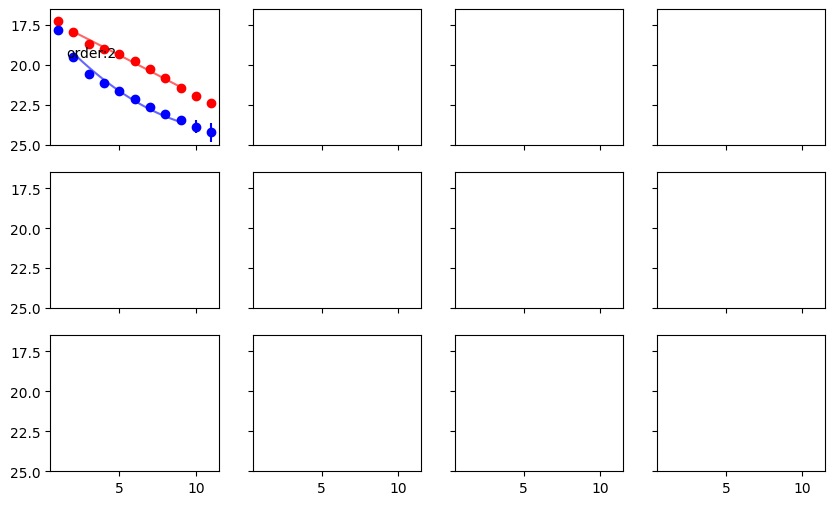

In [73]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))

order = 2
for i in np.arange(0,3):
    for j in np.arange(0,4):

        # calculate polynomial
        p_i, p_g = polynomial_fit(x_i, y_i, x_g, y_g, order)

        # add to subplot
        xp = np.linspace(2, 9, 100)
                
        ax[i,j].errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
        ax[i,j].plot(xp, p_i(xp), 'r-', alpha=0.6)
        
        ax[i,j].errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
        ax[i,j].plot(xp, p_g(xp), 'b-', alpha=0.6)

        ax[i,j].set_xlim(0.5,11.5)
        ax[i,j].set_ylim(25, 16.5)

        ax[i,j].text(1.5 ,19.5, f'order:{order}')

        # calculate parameters
        print(f'polynomial order {order}')
        peaktime_i = find_peak_time(p_i)
        peaktime_g = find_peak_time(p_g)
        print('i-band peak time: ', round(peaktime_i,2))
        print('g-band peak time: ', round(peaktime_g,2))
        print('')

        peakmag_i = find_peak_mag(p_i,peaktime_i)
        peakmag_g = find_peak_mag(p_g,peaktime_g)
        print('i-band peak mag: ', round(peakmag_i,2))
        print('g-band peak mag: ', round(peakmag_g,2))
        print('')

        amp_i = 23.4925 - peakmag_i
        amp_g = 23.1938 - peakmag_g

        print('i-band amplitude:', round(amp_i,2))
        print('g-band amplitude:', round(amp_g,2))
        print('')

        rise_rate_i = amp_i / (peaktime_i - x_i[0])
        rise_rate_g = amp_g / (peaktime_g - x_g[0])
        
        fade_rate_i = amp_i / (x_i[3] - peaktime_i)
        fade_rate_g = amp_g / (x_g[3] - peaktime_g)

        print('i band rise rate:', round(rise_rate_i,2))
        print('g band rise rate:', round(rise_rate_g,2))
        print('i band fade rate:', round(fade_rate_i,2))
        print('g band fade rate:', round(fade_rate_g,2))
        print('')

        t2_i, t3_i = find_t2(x_i, y_i, order, peakmag_i, peaktime_i)
        t2_g, t3_g = find_t2(x_g, y_g, order, peakmag_g, peaktime_g)
        print('i-band t2: ', round(t2_i,2))
        print('g-band t2: ', round(t2_g,2))
        print('i-band t3: ', round(t3_i,2))
        print('g-band t3: ', round(t3_g,2))
        
        
        
        print('')
        print('======================')
        print('')

        # increase polynomial order
        order += 1

        ax[i,j].axvline(peaktime_i, c='r',ls='--', alpha=0.3)
        ax[i,j].axvline(peaktime_g, c='b',ls='--', alpha=0.3)
        
fig.subplots_adjust(wspace=0, hspace=0)

y_i = 
 
-2.625 x + 30.31

y_i = 
 
1.974 x + 11.07

y_g = 
 
-3.285 x + 32.46

y_g = 
 
2.393 x + 8.51



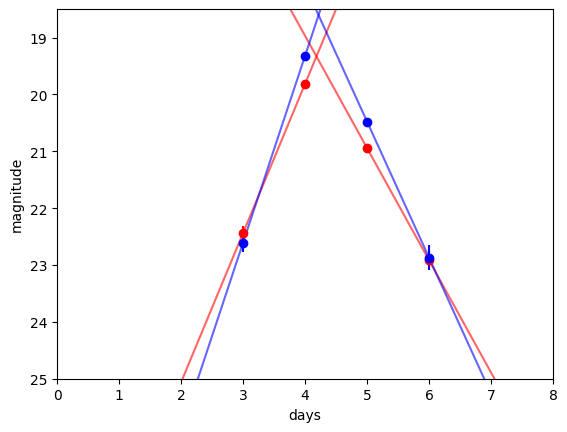

In [38]:
xp = np.linspace(2, 8, 100)

plt.errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
plt.plot(xp, p_i_1(xp), 'r-', alpha=0.6)
print('y_i = ')
print(np.poly1d(p_i_1))
print()

plt.plot(xp, p_i_2(xp), 'r-', alpha=0.6)
print('y_i = ')
print(np.poly1d(p_i_2))
print()

plt.errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
plt.plot(xp, p_g_1(xp), 'b-', alpha=0.6)
print('y_g = ')
print(np.poly1d(p_g_1))
print()

plt.plot(xp, p_g_2(xp), 'b-', alpha=0.6)
print('y_g = ')
print(np.poly1d(p_g_2))
print()


plt.xlim(0,8)
plt.ylim(18.5,25)

plt.xlabel('days')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()
plt.savefig('AT2022kak_polynomial_fit',bbox_inches='tight')

## Colour evolution

In [52]:
x_i = np.array(flc[flc['filt'] == 'i']['time_days'])

y_i = np.array(flc[flc['filt'] == 'i']['MAG_AUTO'])
y_i = [float(x) for x in y_i]
y_i_err = np.array(flc[flc['filt'] == 'i']['MAGERR_AUTO'])
y_i_err = [float(x) for x in y_i_err]

x_g = np.array(flc[flc['filt'] == 'g']['time_days'])

y_g = np.array(flc[flc['filt'] == 'g']['MAG_AUTO'])
y_g = [float(x) for x in y_g]
y_g_err = np.array(flc[flc['filt'] == 'g']['MAGERR_AUTO'])
y_g_err = [float(x) for x in y_g_err]

In [53]:
p_i, p_g = polynomial_fit(x_i[3:7], y_i[3:7], x_g[3:7], y_g[3:7], 4)

/tmp/ipykernel_25297/3847794566.py:3: RankWarning: Polyfit may be poorly conditioned
  z_i = np.polyfit(x_i, y_i, order)
/tmp/ipykernel_25297/3847794566.py:6: RankWarning: Polyfit may be poorly conditioned
  z_g = np.polyfit(x_g, y_g, order)


In [54]:
g_i_diff = [g - i for g, i in zip(y_g, y_i)]

g_i_diff_err = [np.sqrt(g**2 + i**2) for g, i in zip(y_g_err, y_i_err)]

In [55]:
g_i_diff

[-0.0113999999999983,
 0.17540000000000333,
 -0.34580000000000055,
 0.1687999999999974,
 -0.49180000000000135,
 -0.46529999999999916,
 -0.04609999999999914,
 0.2342000000000013,
 -0.20250000000000057,
 -0.3546999999999976]

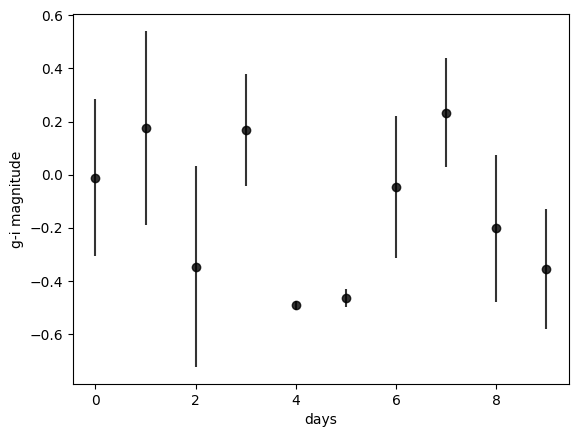

In [56]:
plt.errorbar(x_i, g_i_diff, g_i_diff_err, marker='o', ls='', c='k', alpha=0.8)
# plt.scatter(x_i, g_i_diff, marker='o', ls='', c=g_i_diff, cmap='bwr', zorder=10)

plt.xlabel('days')
plt.ylabel('g-i magnitude')
plt.savefig('AT2022kak_colourevolution',bbox_inches='tight')

### Combining with light curve

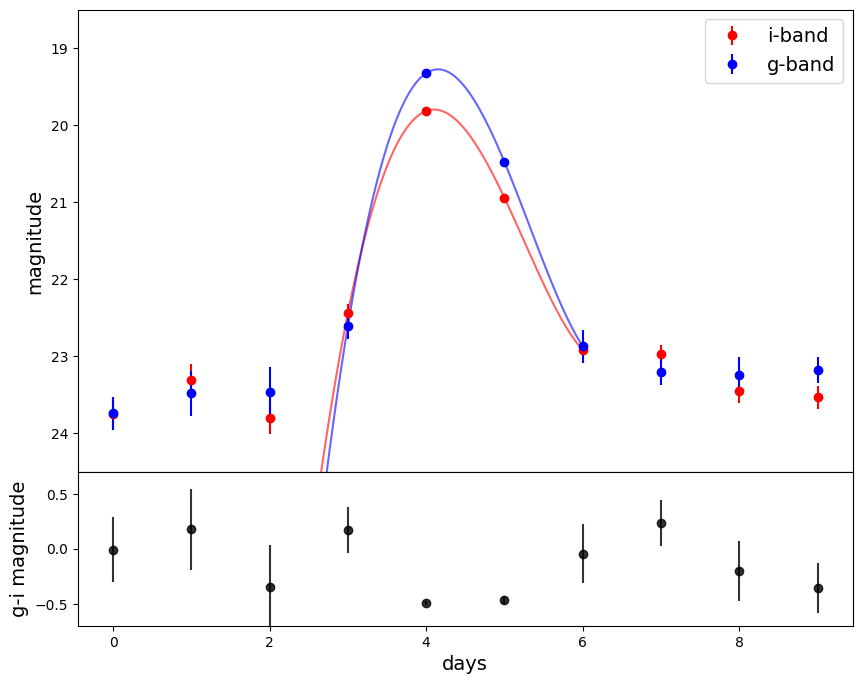

In [64]:
fig, ax = plt.subplots(2,1, sharex='all', gridspec_kw={'height_ratios': [3,1]}, figsize=[10,8])
fig.subplots_adjust(wspace=0, hspace=0)

xp = np.linspace(2, 6, 100)

ax[0].errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r', label='i-band')
ax[0].plot(xp, p_i(xp), 'r-', alpha=0.6)
ax[0].errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b', label='g-band')
ax[0].plot(xp, p_g(xp), 'b-', alpha=0.6)
ax[0].set_ylabel('magnitude', fontsize='14')
ax[0].set_ylim(24.5,18.5)
ax[0].legend(fontsize='14')

ax[1].errorbar(x_i, g_i_diff, g_i_diff_err, marker='o', ls='', c='k', alpha=0.8)
ax[1].set_ylabel('g-i magnitude', fontsize='14')
ax[1].set_ylim(0.7,-0.7)


# plt.xlim(-0.1,8)
plt.xlabel('days', fontsize='14')
plt.gca().invert_yaxis()
plt.savefig('AT2022kak_polynomial_colourevolution.png',bbox_inches='tight')